In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
import numpy as np
import seaborn as sns
from pandas import DataFrame
from sklearn.model_selection import train_test_split

In [2]:
#load dataset
dataset = pd.read_csv("diabetes.csv")

In [3]:
df = dataset.copy()

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Overview of Dataset Characteristics
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
X = dataset.drop('Outcome', axis = 1)
Y = dataset['Outcome']

In [9]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [10]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [11]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [12]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
464,10,115,98,0,0,24.0,1.022,34
223,7,142,60,33,190,28.8,0.687,61
393,4,116,72,12,87,22.1,0.463,37
766,1,126,60,0,0,30.1,0.349,47
570,3,78,70,0,0,32.5,0.270,39
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


## Standardization

### StandardScaler

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_ss=scaler.fit_transform(X_train)

In [14]:
X_train_ss

array([[ 1.89917664, -0.19475093,  1.55717838, ..., -1.04293476,
         1.60661512,  0.06905859],
       [ 0.98286551,  0.64046336, -0.55496107, ..., -0.4148062 ,
         0.62609815,  2.37289284],
       [ 0.06655438, -0.16381707,  0.11203033, ..., -1.29156898,
        -0.02953111,  0.32504017],
       ...,
       [ 1.89917664, -0.62782501,  0.89018698, ...,  1.78364376,
         1.94028358,  0.41036736],
       [-1.1551938 ,  0.6095295 , -3.88991811, ...,  1.36489138,
        -0.78467552, -0.35757739],
       [-1.1551938 ,  0.11458769,  1.44601315, ..., -1.23922494,
        -0.61784129, -1.04019494]])

In [15]:
X_test_ss=scaler.transform(X_test)

In [16]:
X_test_ss

array([[ 0.67742846, -0.7206266 , -0.66612631, ...,  0.2656664 ,
        -0.12611934,  0.83700334],
       [-0.54431971, -0.28755252,  0.27877819, ...,  0.4881286 ,
        -0.95150975, -1.04019494],
       [-0.54431971, -0.41128797, -0.3326306 , ..., -0.15308597,
        -0.92224058, -1.04019494],
       ...,
       [-0.84975676, -3.75214514,  0.22319557, ..., -0.55875233,
        -0.50954538, -1.04019494],
       [ 1.28830255,  0.67139722, -0.22146537, ...,  0.38344051,
        -1.00712116,  0.66634895],
       [-0.54431971, -0.62782501, -0.66612631, ..., -1.01676274,
         0.41243326, -0.86954055]])

### MinMaxScaler

In [17]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler(feature_range=(0, 1))
dataset_mm=pd.DataFrame(mm.fit_transform(X_train))
dataset_mm.head()

,0,1,2,3,4,5,6,7
0,0.588235,0.577889,0.803279,0.000000,0.000000,0.357675,0.403074,0.216667
1,0.411765,0.713568,0.491803,0.523810,0.224586,0.429210,0.260034,0.666667
2,0.235294,0.582915,0.590164,0.190476,0.102837,0.329359,0.164389,0.266667
3,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333
4,0.176471,0.391960,0.573770,0.000000,0.000000,0.484352,0.081981,0.300000


### MaxAbsScaler

In [18]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
dataset_mx = scaler.fit_transform(X_train)
dataset_mx

array([[0.58823529, 0.57788945, 0.80327869, ..., 0.35767511, 0.42231405,
        0.41975309],
       [0.41176471, 0.71356784, 0.49180328, ..., 0.42921013, 0.2838843 ,
        0.75308642],
       [0.23529412, 0.58291457, 0.59016393, ..., 0.32935917, 0.19132231,
        0.45679012],
       ...,
       [0.58823529, 0.50753769, 0.70491803, ..., 0.67958271, 0.46942149,
        0.4691358 ],
       [0.        , 0.70854271, 0.        , ..., 0.6318927 , 0.08471074,
        0.35802469],
       [0.        , 0.6281407 , 0.78688525, ..., 0.33532042, 0.10826446,
        0.25925926]])

### Unit Vector Scaler/Normalizer

In [58]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer(norm = 'l2')
dataset_no = scaler.fit_transform(X_train)
dataset_no

array([[0.06367742, 0.73229033, 0.62403872, ..., 0.15282581, 0.00650783,
        0.21650323],
       [0.02734022, 0.55461594, 0.23434476, ..., 0.11248549, 0.00268325,
        0.23825051],
       [0.02380842, 0.69044409, 0.4285515 , ..., 0.1315415 , 0.00275582,
        0.22022786],
       ...,
       [0.06653277, 0.67198102, 0.57218186, ..., 0.30338945, 0.00755812,
        0.25282454],
       [0.        , 0.93958663, 0.        , ..., 0.28254236, 0.00136607,
        0.19324831],
       [0.        , 0.77839224, 0.59780524, ..., 0.1401106 , 0.00163151,
        0.1307699 ]])

## Transformations

In [19]:
def QQ(dataset,fe):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    dataset[fe].hist()
    plt.subplot(1,2,2)
    stat.probplot(dataset[fe],dist='norm',plot=pylab)
    plt.show()

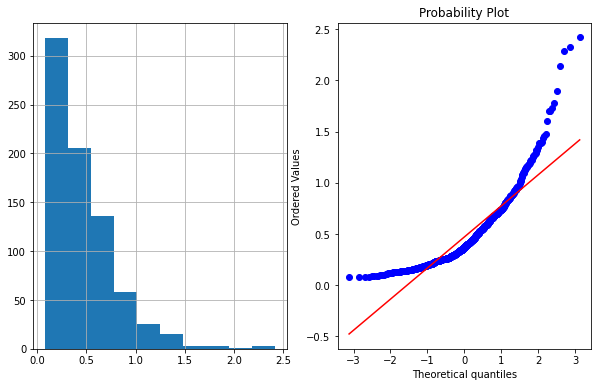

In [20]:
QQ(dataset,'DiabetesPedigreeFunction')

### Logarithmic transformation

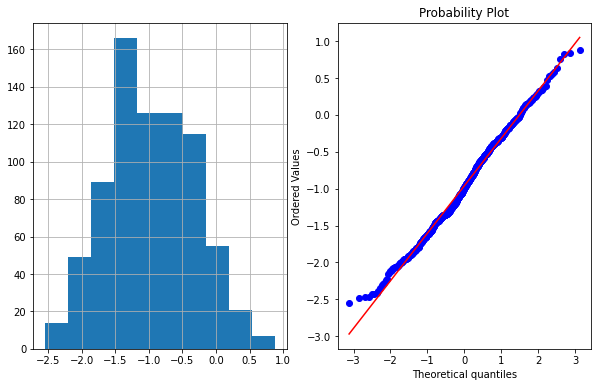

In [21]:
dataset['DiabetesPedigreeFunction_l']=np.log(dataset['DiabetesPedigreeFunction'])
QQ(dataset,'DiabetesPedigreeFunction_l')

### Reciprocal transformation

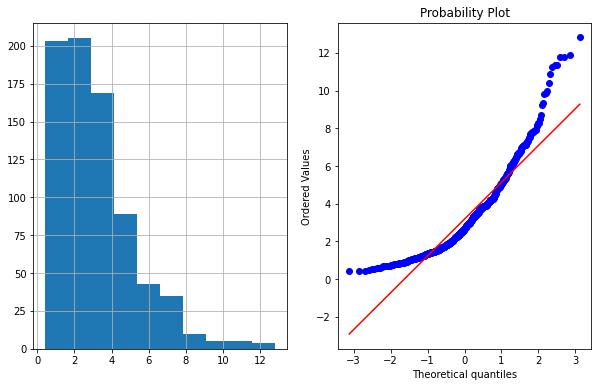

In [22]:
dataset['DiabetesPedigreeFunction_r']=1/dataset.DiabetesPedigreeFunction
QQ(dataset,'DiabetesPedigreeFunction_r')

### Square root transformation

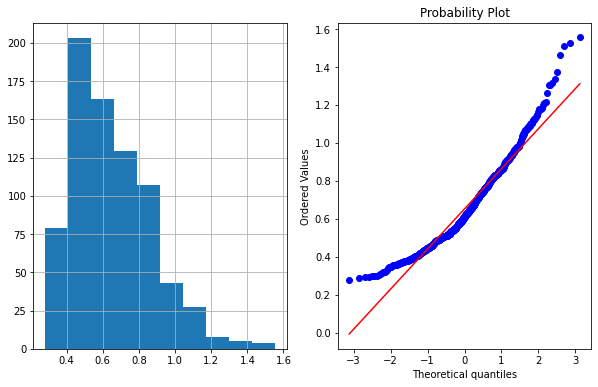

In [23]:
dataset['DiabetesPedigreeFunction_s']=dataset.DiabetesPedigreeFunction**(1/2)
QQ(dataset,'DiabetesPedigreeFunction_s')

### Exponential transformation 

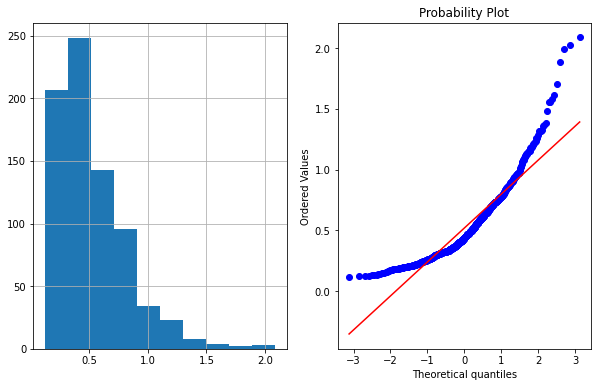

In [24]:
dataset['DiabetesPedigreeFunction_e']=dataset.DiabetesPedigreeFunction**(1/1.2)
QQ(dataset,'DiabetesPedigreeFunction_e')

### Boxcox transformation

In [25]:
dataset['DiabetesPedigreeFunction_b'],parameters=stat.boxcox(dataset['DiabetesPedigreeFunction'])
parameters

-0.07310846861540105

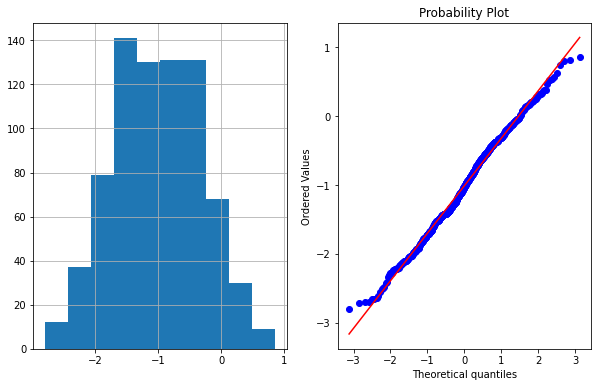

In [26]:
QQ(dataset,'DiabetesPedigreeFunction_b')

## Robust Scaler

In [27]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler(quantile_range=(25.0, 75.0))
dataset_r=pd.DataFrame(rs.fit_transform(X_train))
dataset_r.head()

,0,1,2,3,4,5,6,7
0,1.4,-0.048780,1.625,-0.71875,-0.270378,-0.835509,1.724510,0.294118
1,0.8,0.609756,-0.750,0.31250,1.240557,-0.334204,0.819716,1.882353
2,0.2,-0.024390,0.000,-0.34375,0.421471,-1.033943,0.214720,0.470588
3,-0.4,0.219512,-0.750,-0.71875,-0.270378,-0.198433,-0.093180,1.058824
4,0.0,-0.951220,-0.125,-0.71875,-0.270378,0.052219,-0.306550,0.588235


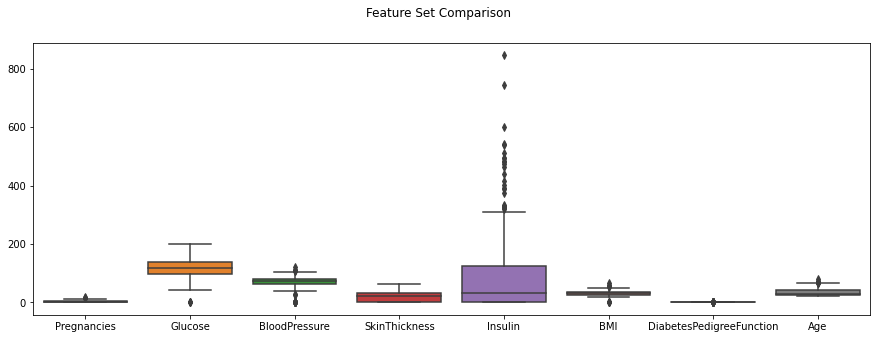

In [60]:
fig = plt.figure(figsize=(15,5))
fig.suptitle('Feature Set Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=X_train)
plt.show()

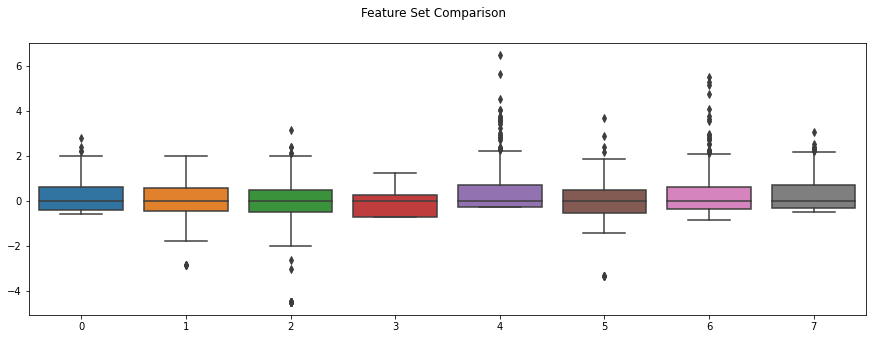

In [29]:
fig = plt.figure(figsize=(15,5))
fig.suptitle('Feature Set Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=dataset_r)
plt.show()

### Quantile Transformer

In [42]:
from sklearn.preprocessing import QuantileTransformer
quantile = QuantileTransformer(output_distribution='normal')
dataset_qt = quantile.fit_transform(X_train)
dataset_qt

C:\Users\19055\Anaconda3\envs\aidi-1100\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (514). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


array([[ 1.66698912, -0.08561323,  2.02482838, ..., -1.20534492,
         1.51942732,  0.32056771],
       [ 0.92912075,  0.71965913, -0.98314503, ..., -0.39349067,
         0.87768081,  1.84990332],
       [ 0.24427539, -0.05132779,  0.02932149, ..., -1.56766615,
         0.28985153,  0.47403131],
       ...,
       [ 1.66698912, -0.58075808,  1.14210277, ...,  1.83654696,
         1.63827413,  0.53508282],
       [-5.19933758,  0.69145643, -5.19933758, ...,  1.33680423,
        -0.93288917, -0.01465917],
       [-5.19933758,  0.26446322,  1.90692566, ..., -1.48176979,
        -0.49325509, -5.19933758]])

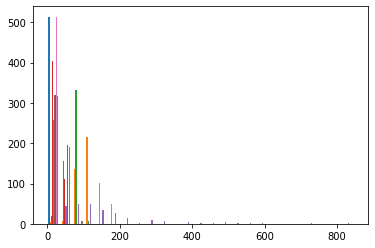

In [43]:
from matplotlib import pyplot
pyplot.hist(X_train, bins=25)
pyplot.show()

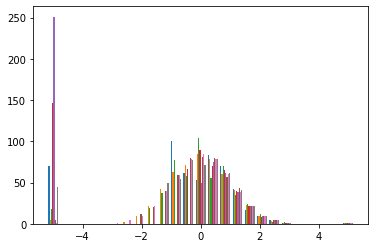

In [44]:
from matplotlib import pyplot
pyplot.hist(dataset_qt, bins=25)
pyplot.show()

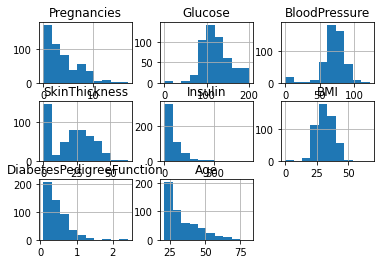

In [45]:
dataset = DataFrame(X_train)
dataset.hist()
pyplot.show()

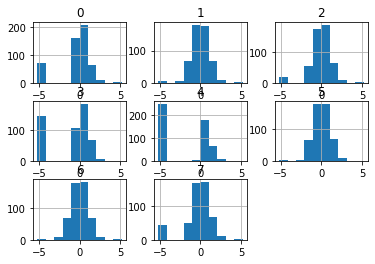

In [46]:
dataset_qt = DataFrame(dataset_qt)
dataset_qt.hist()
pyplot.show()

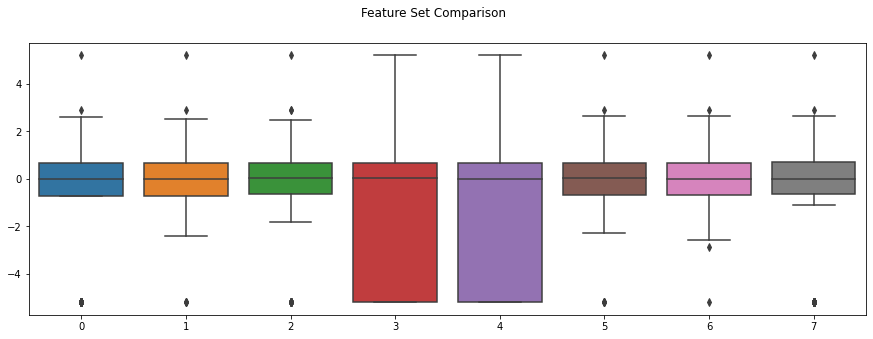

In [47]:
fig = plt.figure(figsize=(15,5))
fig.suptitle('Feature Set Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=dataset_qt)
plt.show()

### Power Transformer

In [48]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(standardize=True)
dataset_pt = power.fit_transform(X_train)
dataset_pt

array([[ 1.53889899, -0.19359931,  1.9822081 , ..., -1.0543492 ,
         1.55991982,  0.41920186],
       [ 1.03807138,  0.64087928, -0.74141484, ..., -0.43815468,
         0.97191376,  1.7232061 ],
       [ 0.34858371, -0.16266785,  0.02647254, ..., -1.29293362,
         0.30865798,  0.66233388],
       ...,
       [ 1.53889899, -0.62686487,  1.03179086, ...,  1.84194766,
         1.69568642,  0.73455198],
       [-1.62188551,  0.60999594, -2.96546065, ...,  1.3948448 ,
        -1.01384387, -0.10210801],
       [-1.62188551,  0.11562537,  1.818296  , ..., -1.24297401,
        -0.64469979, -1.47078043]])

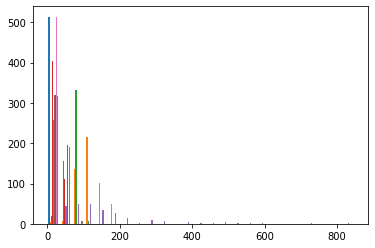

In [49]:
from matplotlib import pyplot
pyplot.hist(X_train, bins=25)
pyplot.show()

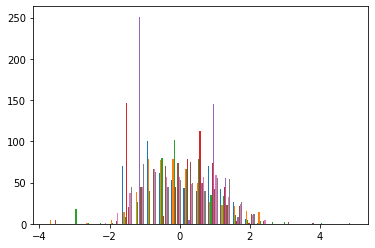

In [50]:
from matplotlib import pyplot
pyplot.hist(dataset_pt, bins=25)
pyplot.show()

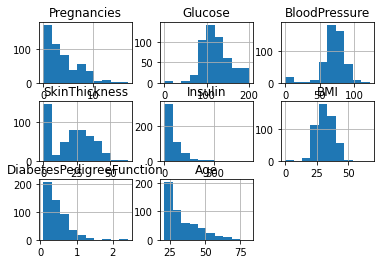

In [51]:
dataset = DataFrame(X_train)
dataset.hist()
pyplot.show()

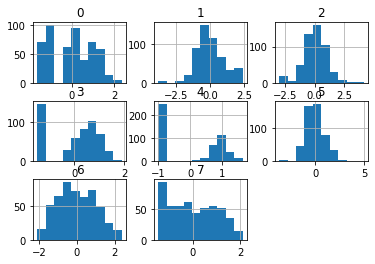

In [52]:
dataset_pt = DataFrame(dataset_pt)
dataset_pt.hist()
pyplot.show()

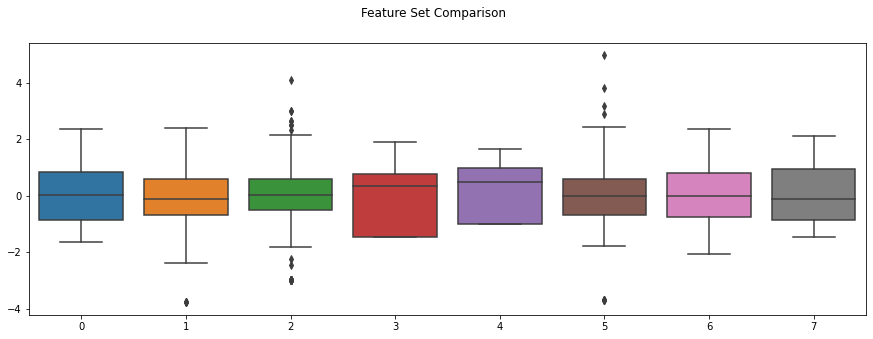

In [61]:
fig = plt.figure(figsize=(15,5))
fig.suptitle('Feature Set Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=dataset_pt)
plt.show()